# Target Imbalance - Unit 01 - Introduction

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%201%20-%20Lesson%20Learning%20Outcome.png"> Lesson Learning Outcome

* **Target Imbalance Lesson is made of 2 units.**
* By the end of this lesson, you should be able to:
  * Analyze how balanced your target distribution is
  * Understand and select Over Sampling or Under Sampling techniques to handle target imbalance
  * Combine ML Pipeline and Target Imbalance

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

  * Analyze how balanced your target distribution is
  * Understand and select Over Sampling or Under Sampling techniques to handle target imbalance



---

In the workplace the chances are high that a dataset will be imbalanced. That means the target variable will contain classes that are not distributed in a similar frequency


<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Question%20mark%20icon.png
">
 **Why do we study target imbalance?**
* Because it is a critical part of an exploratory data analysis flow for a classification task; to evaluate if the classes frequencies are balanced.
* In case it is not, an ML model will likely have low performance in the infrequent classes.


---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%203%20-%20Additional%20Learning%20Context.png"> Additional Learning Context

* We encourage you to:
  * Add **code cells and try out** other possibilities, ie.: play around with parameters values in a function/method, or consider additional function parameters etc.
  * Also, **add your own comments** in the cells. It can help you to consolidate the learning. 

* Parameters in given function/method
  * As you may expect, a given function in a package may contain multiple parameters. 
  * Some of them are mandatory to declare; some have pre-defined values; and some are optional. We will cover the most common parameters used/employed in Data Science for a particular function/method. 
  * However, you may seek additional in the respective package documentation, where you will find instructions on how to use a given function/method. The studied packages are open source, so this documentation is public.
  * **For imbalanced-learn the link is [here](https://imbalanced-learn.org/stable/auto_examples/api/plot_sampling_strategy_usage.html)**.

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

We will install imbalanced-learn to handle imbalanced target, the documentation link is [here](https://imbalanced-learn.org/stable/auto_examples/api/plot_sampling_strategy_usage.html)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Target Imbalance

There will be ML Classification tasks where the classes from the target variable will not have the same proportion (or frequency)
* `imbalanced-learn` is a python package with a set of re-sampling techniques used in datasets showing imbalance in the target

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Imbalanced dataset

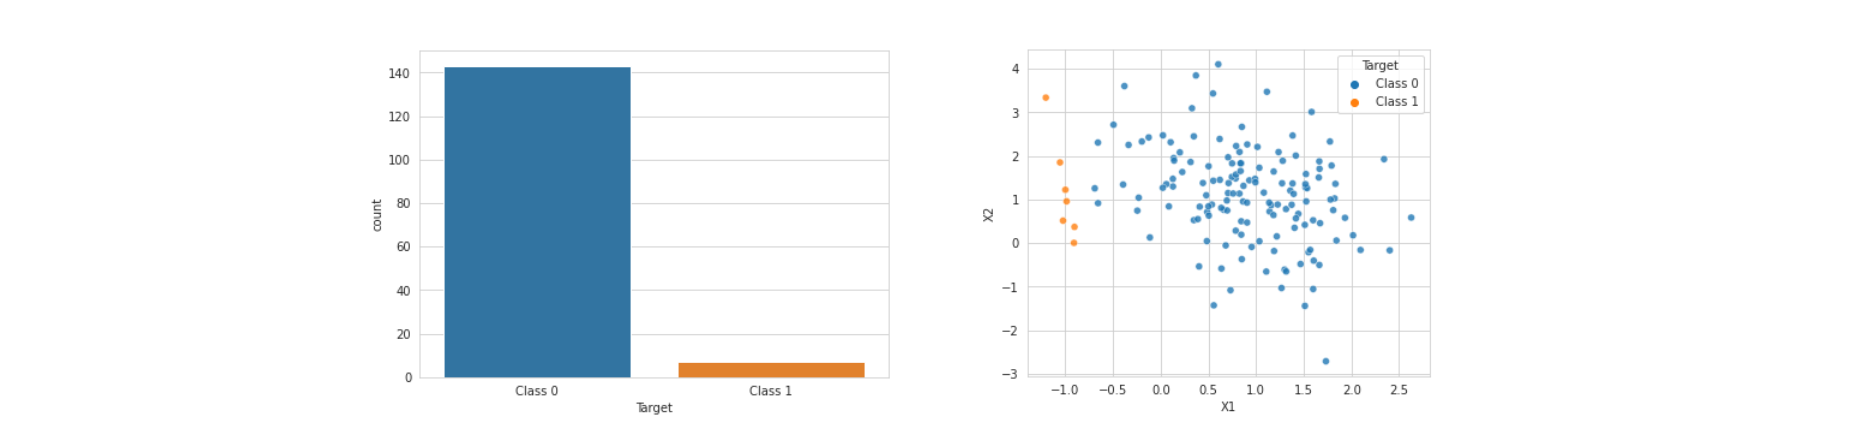

We generate an imbalanced dataset with `make_classification()` function from sklearn. The documentation function is [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). 
* According to the documentation, the arguments are: `n_samples` for the number of samples, `n_feautures` as the number of features, `n_redundant` as features generated as random linear combinations of the informative features, `n_classes` for the number of classes (or labels) of the classification problem,`n_clusters_per_class` as the number of clusters per class, weights as the proportion between the classes, here you define the imbalance, `flip_y` as the fraction of samples whose class is assigned randomly. Larger values introduce noise in the labels and make the classification task harder, and `random_state` determines random number generation for dataset creation.
* It returns NumPy arrays

from  sklearn.datasets import make_classification
X, y = make_classification(n_samples=150, n_features=2, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, weights=[0.95], flip_y=0, random_state=1)

print(type(X), type(y))

We transform them to Pandas DataFrames using the techniques we know: create a DataFrame with X, then assign as target variable y. We finally relabel the classes name with `.replace()`

df_2classes = pd.DataFrame(data=X,columns=['X1','X2'])
df_2classes['Target'] = y
df_2classes['Target'] = df_2classes['Target'].replace({0:'Class 0',1:'Class 1'})
df_2classes.head()

Let's check what size is the dataset

df_2classes.shape

We plot the target classes distribution. It is clearly imbalanced, where class 0 is dominant.

plt.figure(figsize=(7,5))
sns.countplot(x=df_2classes['Target'])
plt.show()

We want to see the imbalance now, including the features. We do a scatter plot with `sns.scatterplot()` and color by `target`. We set alpha, setting the dots transparency, so we can better see the overlapping
* As we expected, we see many more instances of Class 0 than Class 1.

* This exercise is simple since we consider only 2 features. In real life datasets, you will likely have more features, then you need to assess which variables are most linked to the target, so you can plot them. We covered these strategies in previous lessons.

plt.figure(figsize=(6,5))
sns.scatterplot(data=df_2classes, x='X1', y='X2', hue='Target', alpha=0.8)
plt.show()

You can get a given dataset and make it imbalanced, for learning purposes, with `make_imbalance()`, the documentation is [here](https://imbalanced-learn.org/stable/references/generated/imblearn.datasets.make_imbalance.html). According to the documentation the arguments are the features and target, `sampling strategy`, which is the new amount of observations for each class parsed in a dictionary  and `random_state` which is a seed used by the random number generator to make it imbalanced
* Let's take iris dataset

df = sns.load_dataset('iris')
df.head()

We count the target frequency with `.value_counts()`. We see it is all the same, they are balanced

df['species'].value_counts()

sampling strategy is the new amount of observations for each class parsed in a dictionary. Previously we noticed each class had 50 instances; now we are changing in this manner: `'setosa': 10, 'versicolor': 30,'virginica' : 40 `
* The outputs are X_imb and y_imb; we assign them to a DataFrame using the techniques we are already familiar with

from imblearn.datasets import make_imbalance

target_variable = 'species'

X_imb, y_imb = make_imbalance(X=df.drop([target_variable],axis=1),
                              y=df[target_variable],
                              sampling_strategy={'setosa': 10, 'versicolor': 30,'virginica' : 40},
                              random_state=1)
df_3classes = pd.DataFrame(data=X_imb)
df_3classes[target_variable] = y_imb
df_3classes.head()

We check the new target frequencies

df_3classes['species'].value_counts()

And plot the target distribution. It is imbalanced, setosa has a lot less data than the other classes

plt.figure(figsize=(7,5))
sns.countplot(x=df_3classes['species'])
plt.show()

Now we plot 'sepal_length' against 'petal_length' in a scatter plot coloring by 'species'
* We notice less datapoints for setosa

plt.figure(figsize=(9,6))
sns.scatterplot(data=df_3classes, x='sepal_length', y='petal_length', hue='species', alpha=0.8)
plt.show()

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> We will study 2 techniques in these datasets:
* **Over Sampling using SMOTE** (Synthetic Minority Over-sampling Technique). Here you are interested in adding synthetic data that is similar to the rest of the data that belongs to the imbalanced classes 
* **Under Sampling**. Here the idea is to drop observations from classes that are the majority in the dataset, so at the end, the classes will have similar levels from classes with minority frequencies


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> The tradeoff of the technique is: we are "changing" the dataset; therefore, we may lose information; however, the benefit is that we create conditions to fit a better model with the existing data we were provided

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Over Sampling Technique

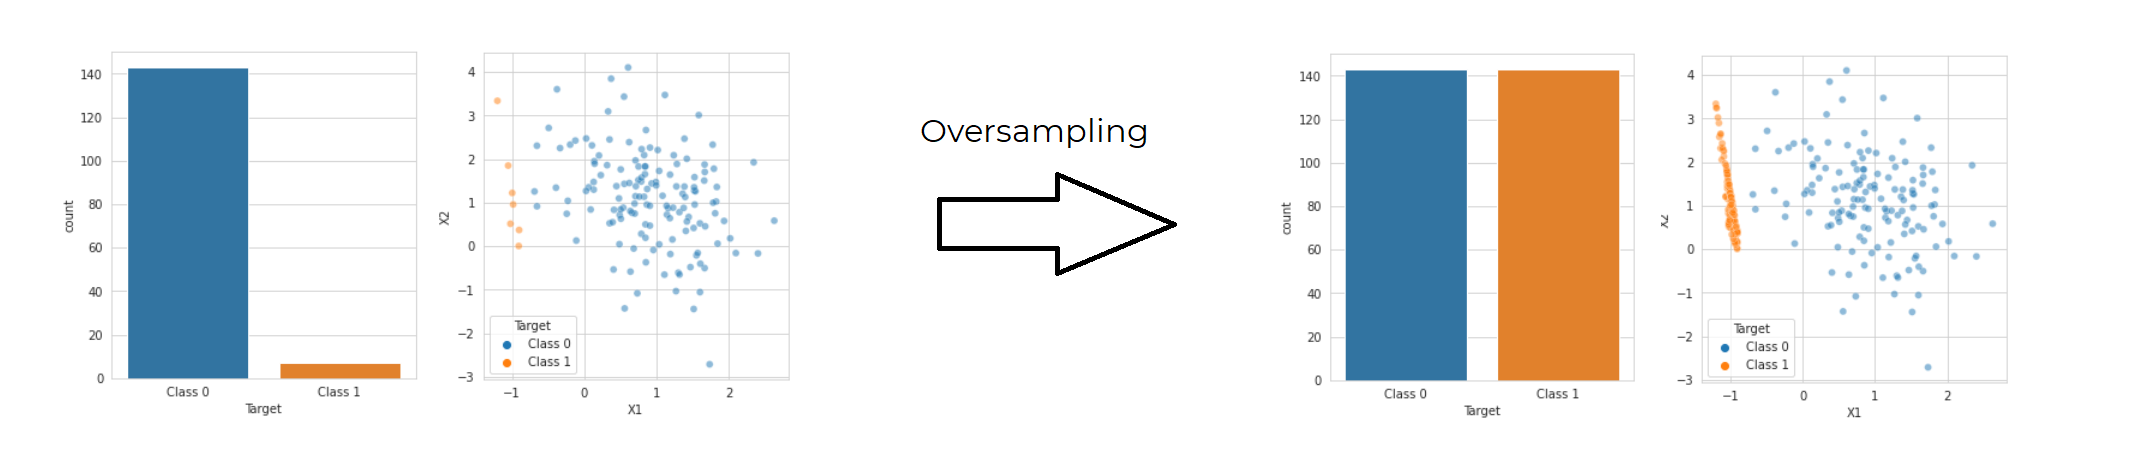

We will use `SMOTE()`, whichs stands for Synthetic Minority Over-sampling Technique. The function documentation is [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html). Here you are interested in adding synthetic data that is similar to the rest of the data that belongs to the imbalanced classes
* The arguments according to the documentation are: `random_state` to control the randomization of the resampling; `sampling_strategy`, which is the information to resample the data set, you can consider:
  * 'minority': resample only the minority class;
  * 'not minority': resample all classes but the minority class;
  * 'not majority': resample all classes but the majority class;
  * 'all': resample all classes


First, a quick recap on `df_2classes`

print(df_2classes.shape)
df_2classes.head()


You create an object with `SMOTE()` with sampling strategy of 'not majority', so it resamples all classes but the majority class; then `.fit_resample()` in the train set (now we do in all data set, but soon we will see a different example).
* It returns X and y as arrays. Then you reassigned the re-sampled data in a DataFrame

from imblearn.over_sampling import SMOTE
smote_over = SMOTE(sampling_strategy='not majority', random_state=1)
X, y = smote_over.fit_resample(X= df_2classes.drop(['Target'],axis=1), y= df_2classes['Target'])

df_2classes_smote =pd.DataFrame(data=X,columns=['X1','X2'])
df_2classes_smote['Target'] = y
df_2classes_smote['Target'] = df_2classes_smote['Target'].replace({0:'Class 0',1:'Class 1'})
df_2classes_smote.head()

Let's check the dataset size
* As we may expect, it increased, due to the fact we added data in the minority class

df_2classes_smote.shape

You remeber this dataset was strongly imbalanced, let's compare  target distribution before and after SMOTE: it is even now!

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.countplot(x=df_2classes['Target'], ax=axes[0])
axes[0].set_title("Before SMOTE")
sns.countplot(x=df_2classes_smote['Target'], ax=axes[1])
axes[1].set_title("After SMOTE")
plt.show()

We do the same scatter plot to check the data after the transformation
* Note: the new data points for Class 1 were synthetically generated

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.scatterplot(data=df_2classes, x='X1', y='X2', hue='Target', alpha=0.5, ax=axes[0])
axes[0].set_title("Before SMOTE")
sns.scatterplot(data=df_2classes_smote, x='X1', y='X2', hue='Target', alpha=0.5,  ax=axes[1])
axes[1].set_title("After SMOTE")
plt.show()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE**

Let's recap df_3classes target distribution

df_3classes['species'].value_counts()

Use the oversampling technique with SMOTE to manage target imbalance in df_3classes

# smote_over = # write your code here, you may use not majority as sampling strategy
# X, y = smote_over.fit_resample(...) ### write your code here
from imblearn.over_sampling import SMOTE
smote_over = SMOTE(sampling_strategy='not majority', random_state=1)
X, y = smote_over.fit_resample(X= df_3classes.drop(['species'],axis=1), y= df_3classes['species'])


df_3classes_smote = pd.DataFrame(data=X)
df_3classes_smote['species'] = y
df_3classes_smote.head()

Let's count the target distribution to validate the resampling

df_3classes_smote['species'].value_counts()

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Under Sampling Technique

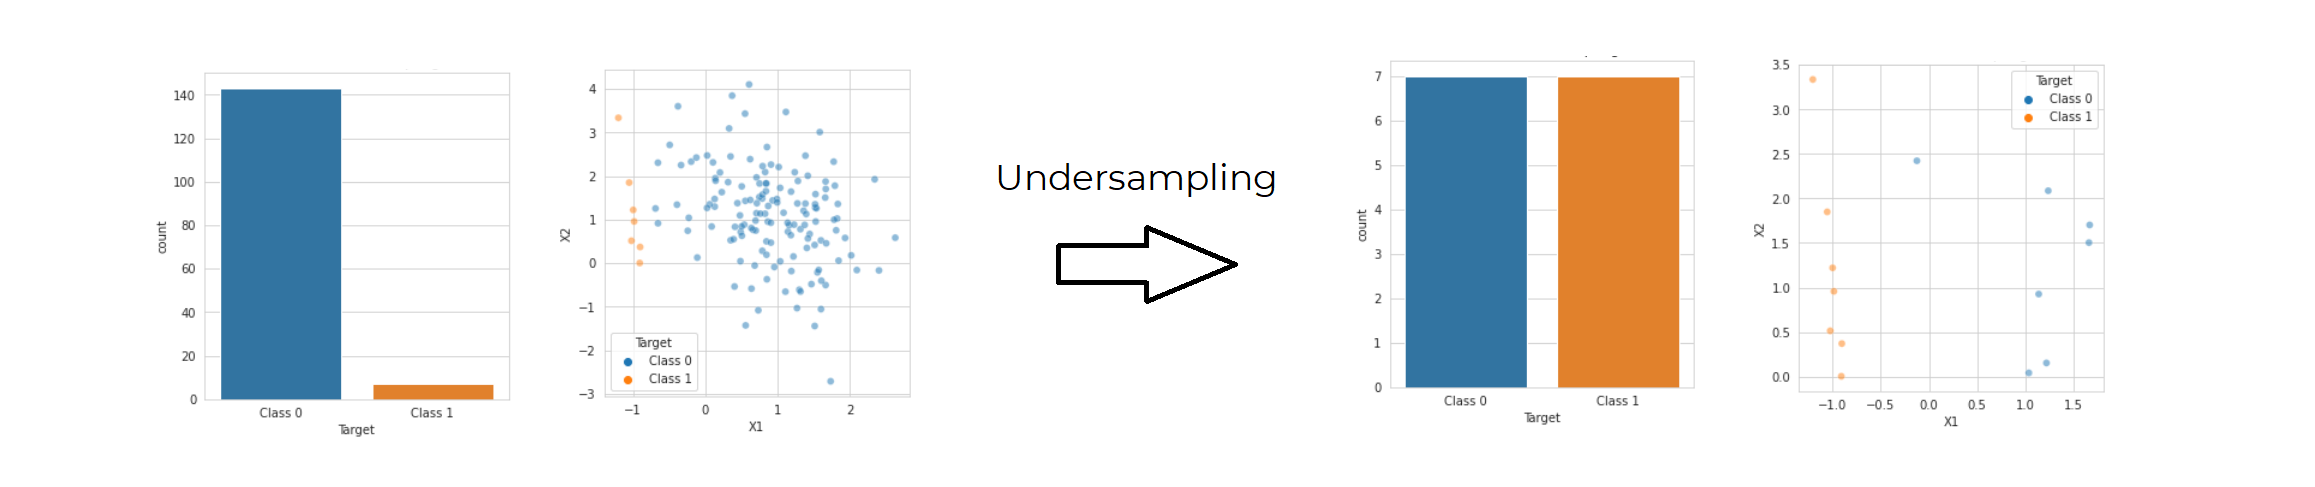

We will used `RandomUnderSampler()`, the function documentation is [here](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html). Here the idea is to drop observations from classes that are the majority in the dataset, so at the end, the classes will have similar levels from classes with minority frequencies


* The arguments according to the documentation are: `random_state` to control the randomization of the resampling; `sampling_strategy`, which is the information to resample the data set, you can consider:
  * 'minority': resample only the minority class;
  * 'not minority': resample all classes but the minority class;
  * 'not majority': resample all classes but the majority class;
  * 'all': resample all classes

Let's use df_2classes - which is the imbalanced dataset

df_2classes['Target'].value_counts()

We apply `RandomUnderSampler()` with under resampling of all classes but the minority class, then we `.fit_sample()`. The result is a pair of arrays (X and y), so we assign them to a DataFrame

from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy='not minority',random_state=1)
X, y = under_sampler.fit_resample(X= df_2classes.drop(['Target'],axis=1), y= df_2classes['Target'])

df_2classes_under = pd.DataFrame(data=X, columns=['X1','X2'])
df_2classes_under['Target'] = y
df_2classes_under['Target'] = df_2classes_under['Target'].replace({0:'Class 0',1:'Class 1'})
df_2classes_under.head()

Let's check the dataset size
* As we may expect, it decreased, due to the fact that we removed data from the majority class

df_2classes_under.shape

You remember this dataset was strongly imbalanced, let's compare  target distribution before and after undersampling

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.countplot(x=df_2classes['Target'], ax=axes[0])
axes[0].set_title("Before Under Sampling")
sns.countplot(x=df_2classes_under['Target'], ax=axes[1])
axes[1].set_title("After Under Sampling")
plt.show()

We do the same scatter plot to check how the data is after transformation

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.scatterplot(data=df_2classes, x='X1', y='X2', hue='Target', alpha=0.5, ax=axes[0])
axes[0].set_title("Before Under Sampling")
sns.scatterplot(data=df_2classes_under, x='X1', y='X2', hue='Target', alpha=0.5,  ax=axes[1])
axes[1].set_title("After Under Sampling")
plt.show()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE**

Let's recap df_3classes target distribution

df_3classes['species'].value_counts()

Use the undersampling technique to manage target imbalance in df_3classes

# under_sampler = # write your code here, you may use not minority as sampling strategy
# X, y = under_sampler.fit_resample(...) # write your code here
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy='not minority',random_state=1)
X, y = under_sampler.fit_resample(X= df_3classes.drop(['species'],axis=1), y= df_3classes['species'])

df_3classes_under = pd.DataFrame(data=X)
df_3classes_under['species'] = y
df_3classes_under.head()

Let's count the target distribution to validate the resampling

df_3classes_under['species'].value_counts()

---